# Spotify Tracks Dataset

In [279]:
import numpy as np
import pandas as pd

В качестве второго датасета я выбрала датасет "Spotify Tracks DB". Он включает различные характеристики треков с платформы Spotify, такие, как:

    1. жанр (genre)
    2. исполнитель (atrist_name)
    3. название трека (track_name)
    4. идентификатор трека (track_id)
    5. популярность (popularity)
    6. акустичность (acousticness)
    7. танцевальность (danceability)
    8. продолжительность [в милисекундах] (duration_ms)
    9. энергичность (energy)
    10. инструментальность (instrumentalness)
    11. ключ (key)
    12. живость (liveness)
    13. громкость (loudness)
    14. модальность (mode)
    15. словестность (speechiness)
    16. темп [кол-во ударов/ минута] (tempo)
    17. временная сигнатруа [кол-во ударов/ бар] (time_signature)
    18. валентность (valence)

На основе перечисленных характеристик, каждую из которых я еще разберу подробнее, можно сформулировать задачу следующим образом: **обучить модель, которая на основании перечисленных признаков и характеристик трека (некоторых или всех) сможет наилучшим образом предсказать значение валентности этого трека.** Под валентностью понимается некоторая мера, описывающая позитивность трека. Например, треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфоричные), в то время как треки с низкой валентностью звучат более негативно (например, грустные, подавленные, злые). 

Так, в качетсве целевого признака будем считать признак 'valence'.
Чтобы разобраться, что перечисленные характеристики обозначают, и какие зависимости существуют между ними, рассмотрим датасет поближе.

In [280]:
spot_tracks_file_path = '../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv'
data = pd.read_csv(spot_tracks_file_path)
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [281]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [282]:
data.describe(include='all')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725,232725,232725,232725,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000
unique,27,14564,148615,176774,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,0UE0RhnRaEYsiYgXpyLoZc,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151744,NaN,NaN,200760,NaN
mean,NaN,NaN,NaN,NaN,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,NaN,0.215009,-9.569885,NaN,0.120765,117.666585,NaN,0.454917
std,NaN,NaN,NaN,NaN,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,NaN,0.198273,5.998204,NaN,0.185518,30.898907,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.778000,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054000,NaN,0.660000


В данных нет пропусков, т.к. признак count имеет одинаковое значение для всех колонок (характеристик). Часто фигурирует значение NaN из-за того, что для числовых признаков вычисляются самое распространенное значение (top), его частота (freq) и число уникальных признаков (unique) или же для объектных признаков (строки/ временные метки) вычисляются среднее значение (mean), среднеквадратичное значение (std), минимум (min), макисмум (max) и процентили (25, 50, 75%).

Попробуем это исправить.

Сначала посмотрим на численные признаки. Их область значений и типы данных.

In [283]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [284]:
features = []
for index in data.columns:
    dtype = data[index].dtype
    if dtype == int or dtype == float:
        print(index, ' :', dtype, ' [', data[index].min(), ', ', data[index].max(), ']\n')
        features.append(index)

popularity  : int64  [ 0 ,  100 ]

acousticness  : float64  [ 0.0 ,  0.996 ]

danceability  : float64  [ 0.0569 ,  0.9890000000000001 ]

duration_ms  : int64  [ 15387 ,  5552917 ]

energy  : float64  [ 2.0300000000000002e-05 ,  0.9990000000000001 ]

instrumentalness  : float64  [ 0.0 ,  0.9990000000000001 ]

liveness  : float64  [ 0.00967 ,  1.0 ]

loudness  : float64  [ -52.457 ,  3.7439999999999998 ]

speechiness  : float64  [ 0.0222 ,  0.9670000000000001 ]

tempo  : float64  [ 30.379 ,  242.903 ]

valence  : float64  [ 0.0 ,  1.0 ]



Если значение признака 'продолжительность трека' является вполне ясным, то такие признаки, как 'популярность', 'акустичность' или 'живость' требуют разъяснений. Описание этих признаков я нашла на сайте Spotify https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

Рассмотрим, что они значат и почему принимают именно такой диапозон значений.

* **популярность (popularity):** характеризует прослушиваемость трека, принимает значения от 0 до 100 в процентом соотношении.
* **акустичность (acousticness):** показывает, является ли трек акустическим, принимает значения от 0.0 до 1.0. 1.0 представляет собой высокую вероятность того, что трек является акустическим.
* **танцевальность (danceability):** описывает, насколько трек подходит для танцев. Предположение сновывается на комбинации музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0.0 соответствует наименее танцевальному треку, а 1.0 — наиболее танцевальному.
* **энергичность (energy):** является перцептивной мерой интенсивности и активности, ринимает значения от 0.0 до 1.0. Как правило, энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал обладает высокой энергией (энергичность близится к 1.0), в то время как прелюдия Баха имеет низкие баллы по шкале (энергичность близка к 0.0). Перцептивные особенности, способствующие этому свойству, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.
* **инструментальность (instrumentalness):** предсказывает, не содержит ли трек вокальные партии. В этом контексте звуки ”Ох“ и ”Aaa" рассматриваются как инструментальные. Рэп или разговорные слова треков являются явно "вокальными". Чем ближе значение инструментальности к 1.0, тем больше вероятность того, что трек не содержит вокального содержания. Значения выше 0.5 предназначены для представления инструментальных треков, но вероятность выше, когда значение приближается к 1.0.
* **живость (liveness):** обнаруживает присутствие "живого звука". Более высокие значения живости представляют собой повышенную вероятность того, что трек был выполнен вживую. Значение выше 0.8 обеспечивает высокую вероятность того, что трек был записан в режиме реального времени (live-выступление).
* **громкость (loudness):** общая громкость трека в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости дорожек. Громкость — это качество звука, которое является основным психологическим коррелятом физической силы (амплитуды). Типичные значения находятся в диапазоне от -60 до 0 дБ.
* **словестность (speechiness):** обнаруживает присутствие произнесенных слов в треке. Чем более эксклюзивна речь, как запись (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произносимых слов. Значения от 0.33 до 0.66 описывают треки, которые могут содержать как музыку, так и речь, либо в разрезе, либо слоисто, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют собой музыку и другие не связанные с речью треки.
* **темп [кол-во ударов/ минута] (tempo):** общий расчетный темп трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данной пьесы, непосредственно вытекает из средней длительности ритма.
* **временная сигнатруа [кол-во ударов/ бар] (time_signature):**  примерная общая временная сигнатура трека. Временная сигнатура (метр) - это нотационное соглашение, определяющее, сколько ударов приходится на каждый бар (или меру).
* **валентность (valence):** мера от 0.0 до 1.0, описывающая музыкальную позитивность, передаваемую треком.

Распределение значений выглядит следующим образом.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6701fe940>,
      dtype=object)

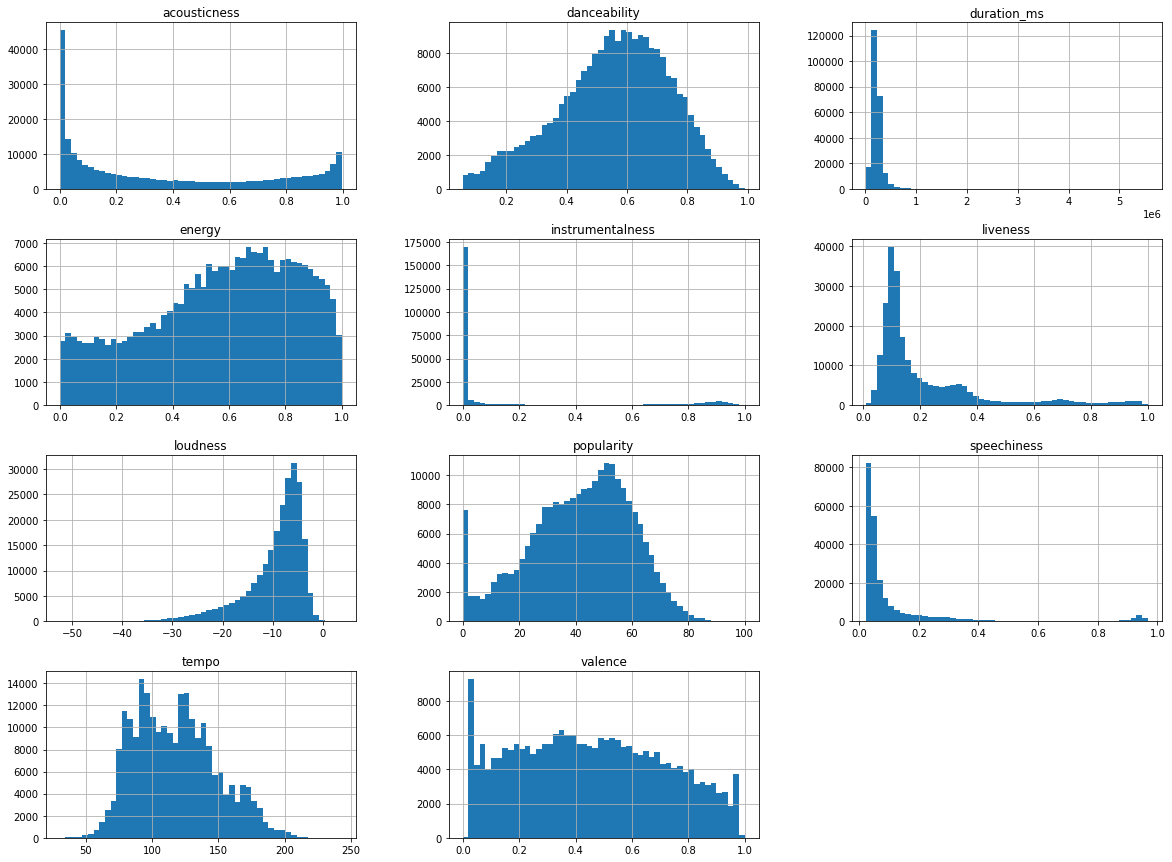

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline
data[features].hist(bins=50,figsize=(20,15))

Теперь рассмотрим категориальные признаки. Их область значений и типы данных.

In [286]:
data.describe(include = ['O'])

,genre,artist_name,track_name,track_id,key,mode,time_signature
count,232725,232725,232725,232725,232725,232725,232725
unique,27,14564,148615,176774,12,2,5
top,Comedy,Giuseppe Verdi,Home,0UE0RhnRaEYsiYgXpyLoZc,C,Major,4/4
freq,9681,1394,100,8,27583,151744,200760


In [287]:
cat_col = []
for index in data.columns:
    dtype = data[index].dtype
    if dtype == object:
        print(index, ' :', len(data[index].unique()), 'UNIQUE ELEMENTS \n', dtype, data[index].unique(), '\n')
        cat_col.append(index)

genre  : 27 UNIQUE ELEMENTS 
 object ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World'] 

artist_name  : 14564 UNIQUE ELEMENTS 
 object ['Henri Salvador' 'Martin & les fées' 'Joseph Williams' ... 'Dharmasoul'
 'Swim' 'Jr Thomas & The Volcanos'] 

track_name  : 148615 UNIQUE ELEMENTS 
 object ["C'est beau de faire un Show" "Perdu d'avance (par Gad Elmaleh)"
 "Don't Let Me Be Lonely Tonight" ... 'P.O.P.' 'Burning Fire'
 "You Don't Have To Hurt No More"] 

track_id  : 176774 UNIQUE ELEMENTS 
 object ['0BRjO6ga9RKCKjfDqeFgWV' '0BjC1NfoEOOusryehmNudP'
 '0CoSDzoNIKCRs124s9uTVy' ... '2iZf3EUedz9MPqbAvXdpdA'
 '1qWZdkBl4UVPj9lK6HuuFM' '34XO9RwPMKjbvRry54QzWn'] 

key  : 12 UNIQUE ELEMENTS 
 object ['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B'] 

mode  : 2 UNIQUE ELEMENTS 
 obje

Категориальных признаков значительно меньше. Значения большинства из них являются понятными, однако, лично для меня было загадкой, что означает 'key', 'mode' и 'time_signature'.

Опять же обратимся к источнику Spotify.

* **ключ (key):** предполагаемый общий ключ трека. Целые числа сопоставляются с шагами, используя стандартную нотацию класса высоты тона. Например, 0 = C, 1 = C♯/D♭, 2 = D и так далее. Если ключ не был обнаружен, то значение равно -1.
* **модальность (mode):** указывает на модальность (мажор или минор) трека, тип шкалы, из которой выводится его мелодическое содержание. Мажор представлен 1, а Минор 0.
* **временная сигнатура (time_signature):** примерная общая временная сигнатура трека. Временная сигнатура (метр) - это нотационное соглашение, определяющее, сколько ударов приходится на каждый бар (или меру).

Как выяснилось, на платформе Spotify все вышеперечисленные признаки принимают численные значения. Преобразуем наш датасет согласно всем указаниям.

Преобразуем значения ключа.

In [288]:
upd_data = data.copy(deep=True)

upd_data.loc[upd_data['key'] == 'C', 'key'] = 0
upd_data.loc[upd_data['key'] == 'C#', 'key'] = 1
upd_data.loc[upd_data['key'] == 'D', 'key'] = 2
upd_data.loc[upd_data['key'] == 'D#', 'key'] = 3
upd_data.loc[upd_data['key'] == 'E', 'key'] = 4
upd_data.loc[upd_data['key'] == 'F', 'key'] = 5
upd_data.loc[upd_data['key'] == 'F#', 'key'] = 6
upd_data.loc[upd_data['key'] == 'G', 'key'] = 7
upd_data.loc[upd_data['key'] == 'G#', 'key'] = 8
upd_data.loc[upd_data['key'] == 'A', 'key'] = 9
upd_data.loc[upd_data['key'] == 'A#', 'key'] = 10
upd_data.loc[upd_data['key'] == 'B', 'key'] = 11


Преобразуем модальность.

In [289]:
upd_data.loc[upd_data['mode'] == 'Major', 'mode'] = 1
upd_data.loc[upd_data['mode'] == 'Minor', 'mode'] = 0
upd_data['mode'][0:5]

0    1
1    0
2    0
3    1
4    1
Name: mode, dtype: int64

Преобразуем временную сигнатуру.

In [290]:
upd_data['time_signature'].unique()
string = []
for i in upd_data['time_signature'].unique():
    for j in i.split(sep='/'):
        string.append(int(j))
    upd_data.loc[upd_data['time_signature'] == i, 'time_signature'] = string[0]/string[1]
    string.clear()
upd_data['time_signature'] =  pd.to_numeric(upd_data.time_signature, errors='coerce')

Теперь, когда все три категориальных признака преобразованы  в численные, рассмотрим принимаемые ими значения.

In [291]:
print(cat_col)
for index in cat_col:
    dtype = upd_data[index].dtype
    if dtype == int or dtype == float:
        print(index, ' :', dtype, ' [', upd_data[index].min(), ', ', upd_data[index].max(), ']\n')

['genre', 'artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature']
key  : int64  [ 0 ,  11 ]

mode  : int64  [ 0 ,  1 ]

time_signature  : float64  [ 0.0 ,  1.25 ]



Построим их распределение.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe66f7285c0>,
      dtype=object)

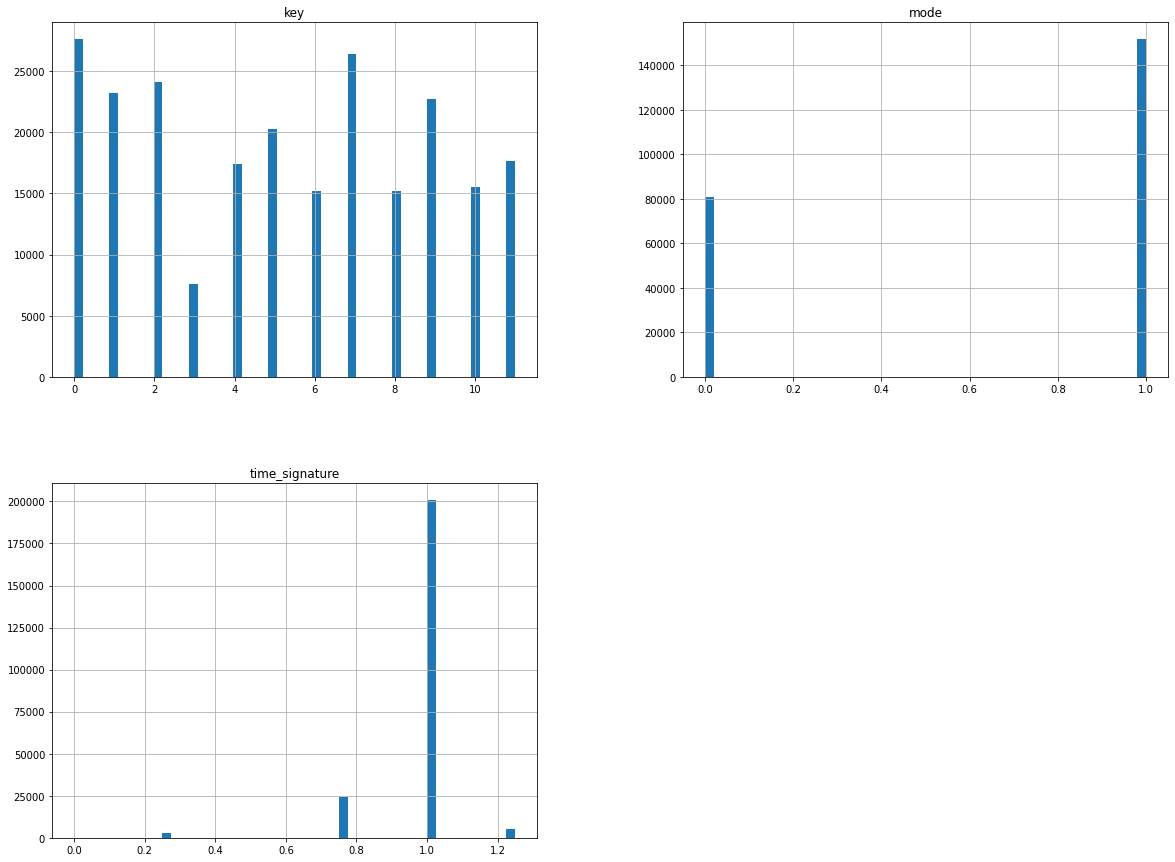

In [292]:
%matplotlib inline
upd_data[['key', 'mode', 'time_signature']].hist(bins=50,figsize=(20,15))

Категориальный признак 'track_id' я не считаю весомым при обучении модели, так что удалим его.

In [293]:
del upd_data['track_id']

In [294]:
upd_data.describe(include=['O'])

,genre,artist_name,track_name
count,232725,232725,232725
unique,27,14564,148615
top,Comedy,Giuseppe Verdi,Home
freq,9681,1394,100


Построим распределение оставшихся категориальных признаков. В дальнейшем, для того, чтобы их использовать для обучения модели, их тоже придется конвертировать одним из способов.

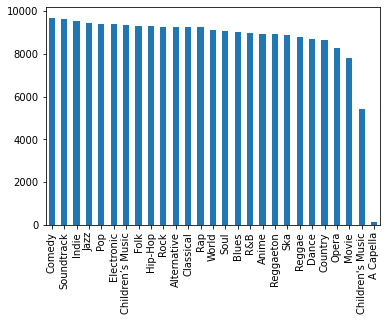

In [295]:
upd_data['genre'].value_counts().plot.bar()

Несмотря на то, что признаки 'artist_name' и 'track_name' категориальные, они принимают значительно большое число уникальных значений. Поэтому постоить распределение значений не получается с помощью функции plot.bar — стек быстро переполняется. 

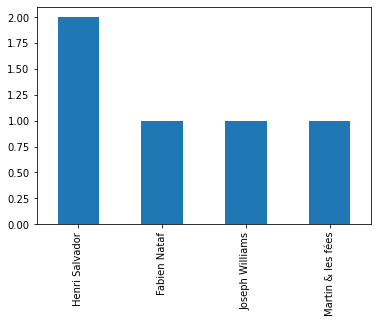

In [296]:
upd_data['artist_name'].head().value_counts().plot.bar()
#upd_data['track_name'].value_counts().plot.bar()

Я решила сгенерировать новый численный признак, который будет упорядочивать выбранную категорию по какому-то признаку.
Пусть кодируемый признак – 'artist_name' (имя исполнителя), кодирующий признак – 'energy' (энергичность). Тогда новый признак будет описывать среднее значениее энергичности для каждого исполнителя.

In [297]:
def code_mean(data, cat_feature, real_feature):
    return(data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))

In [298]:
upd_data['artist_name_mean_energy'] = code_mean(upd_data, 'artist_name', 'energy')

Построим зависимость сгенерированного приизнака 'artist_name_mean_energy' и признака 'energy', выбранного в качестве кодирующего.

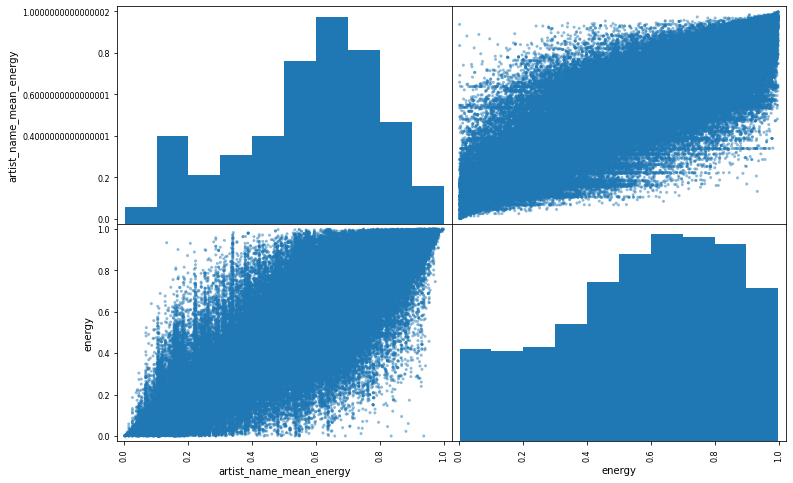

In [299]:
from pandas.plotting import scatter_matrix
attributes = ['artist_name_mean_energy', 'energy']
scatter_matrix(upd_data[attributes], figsize=(12, 8));

По графикам видно, что между ними прослеживается линейная зависимость.
Распределение 'artist_name_mean_energy' будет выглядеть следующим образом.

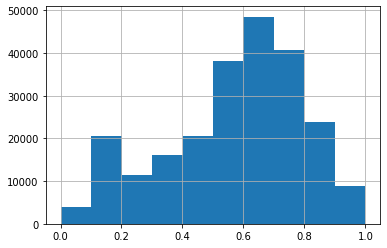

In [300]:
%matplotlib inline
upd_data['artist_name_mean_energy'].hist()

In [301]:
def upd_num_cols(data, num_col):
    for index in data.columns:
        dtype = data[index].dtype
        if (dtype == int or dtype == float) and index not in num_col:
            num_col.append(index)
    num_col.remove('valence')

SyntaxError: invalid syntax (<ipython-input-301-db74201aaa06>, line 1)

Опытным путем я выяснила, что среднее значение отклонения минимально при следующих обучающих признаках.

In [ ]:
features = ['popularity','danceability', 'duration_ms', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'tempo', 'mode', 'time_signature','artist_name_mean_energy']
X = upd_data[features]
y = upd_data['valence']


Как можно заметить, были убраны признаки 'key', 'liveness' и 'acousticness'.

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
print(len(train_X), "train +", len(val_X), "test")
train_X.head()

Будем в использовать алгоритм RandomForestRegressor() из sklearn.ensemble.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
st_model = RandomForestRegressor()
st_model.fit(train_X, train_y)
val_predictions = st_model.predict(val_X)

In [ ]:
from sklearn.metrics import mean_absolute_error
as_mae = mean_absolute_error(val_predictions, val_y)
print(val_predictions[0:5])
print(val_y.head().values)
print("Validation MAE: ", as_mae)

Среднее значение ошибки небольшое. Сотавляет около 10%. Проверим модель на всем датасете.

In [ ]:
predictions = st_model.predict(X)
as_mae = mean_absolute_error(predictions, y)
print(predictions[0:5])
print(y.head().values)
print("Validation MAE on all dataset: ", as_mae)


Посмотрим на корреляцию всех обучающих признаков. 

In [ ]:
print(features)

In [ ]:
scatter_matrix(upd_data[features], figsize=(24, 16));

Посмотрим на корреляцию обущающих признаков и целевого признака.

In [ ]:
scatter_matrix(upd_data[['popularity','danceability','duration_ms','valence']], figsize=(12, 8));

In [ ]:
scatter_matrix(upd_data[['energy', 'instrumentalness', 'valence']], figsize=(12, 8))

In [ ]:
scatter_matrix(upd_data[['loudness', 'speechiness', 'valence']], figsize=(12, 8))

In [ ]:
scatter_matrix(upd_data[['tempo','mode', 'valence']], figsize=(12, 8))

In [ ]:
scatter_matrix(upd_data[['time_signature','artist_name_mean_energy','valence']], figsize=(12, 8))

Посмотрим на корреляцию убранных признаков и целевого признака.

In [ ]:
scatter_matrix(upd_data[['liveness', 'key', 'acousticness','valence']], figsize=(12, 8))

# Проблемы, с которыми я стокнулась

Я выбрала датасет "Spotify Tracks DB" и выделила целевой признак — "валентность", который может принимать значения в интервале [0.0, 1.0]. Соответсвенно, **моей задачей стало определение эмоциональной окраски трека** (степени его позитивности), согласна выбранным признакам. Далее, я рассмотрела все представленные признаки подробнее — убедилась, что в данных нет пропусков и нулевых значений. В отличие от предыдущего датасета, этот датасет включал изобилие численных признаков, каждый из которых каким-то образом характеризовал трек. Категориальных признаков было всего несколько. Такие признаки, как 'key', 'mode' и 'time_signature' я перекодировала в численные, согласно инструкциям на платформе Spotify. Категории 'track_name' и 'track_id' я не посчитала необходимым включать в тренировочную выборку, т.к. они не показались мне валидными в решении задачи — у каждого трека есть уникальный идентификатор и название (да, в датасете присутствовали повторяющиеся названия треков, но все таки уникальность была значительно высокой). Категорию 'artist_name' я упорядочила по признаку 'energy', тем самым сгенерировав новый численный признак 'artist_name_mean_energy', который будет описывать среднее значениее энергичности для каждого исполнителя. 
 
Я построила зависимости всех признаков от целевого и опытным путем определила самые значимые признаки, необходимые для обучения модели. В конечную выборку я включила не все признаки — 'key', 'liveness', 'acousticness' не представили ценности при обучени модели. Таким образом, среднее значение ошибки для решение первоначальной задачи = 0.10. Это около 10%.